In [1]:
import os
from pathlib import Path
HOME = os.environ['HOME']

dataroot = Path(os.path.join(HOME, 'data/ciss'))
import gdal

In [2]:
cd {dataroot}

/Users/klay6683/data/ciss


In [3]:
ls

PDSdata-2015-01-30T13-52-14-08-00/        index.lbl
PDSdata-2015-02-20T14-24-33-08-00/        index.tab
PDSdata_highest_res/                      pdsdata_sRM_2015-03-12T18-29-13.808978-2/
PDSdata_miodrak_list/                     pipeline_out/
img_from_miodraks_set/


In [4]:
cd pdsdata_sRM_2015-03-12T18-29-13.808978-2/

/Users/klay6683/data/ciss/pdsdata_sRM_2015-03-12T18-29-13.808978-2


In [5]:
ls

N1485648669_1.IMG        N1485648669_1_CALIB.LBL  TLMTAB.FMT
N1485648669_1.LBL        N1485648669_1_full.jpg   checksum.txt
N1485648669_1_CALIB.IMG  PREFIX2.FMT              manifest.txt


In [5]:
path = 'img_cal_cylmap_rot.cub'
ds = gdal.Open(path)

In [6]:
img = ds.ReadAsArray()

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['image.cmap'] = 'gray'

In [8]:
img[img<0] = np.nan

In [9]:
from IPython.html.widgets import interactive, interact, fixed
from IPython.display import display
from skimage import data, filter, io

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [10]:
interpolators = ['none', 'nearest', 'bilinear', 'bicubic',
    'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser',
    'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc',
    'lanczos']
def myimshow(vmin, vmax, i):
    fig, ax = plt.subplots()
    ax.imshow(img[1010:1250, 550:549+1180], vmin=vmin, vmax=vmax, aspect='auto',
              interpolation=interpolators[i])
    ax.set_title('vmin: {:.2f}, vmax: {:.2f}, interpolator:{}'.format(vmin,vmax,
                                                                     interpolators[i]))
    plt.show()

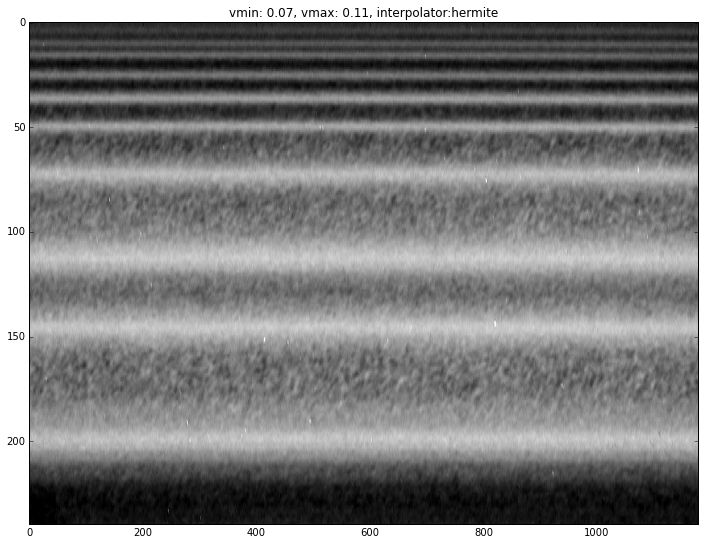

In [11]:
interact(myimshow, vmin=(0.06, 0.09, 0.001),
         vmax=(0.10, 0.12, 0.001), i=(0, len(interpolators)-1));

In [12]:
subframe = img[1010:1250, 550:1180]

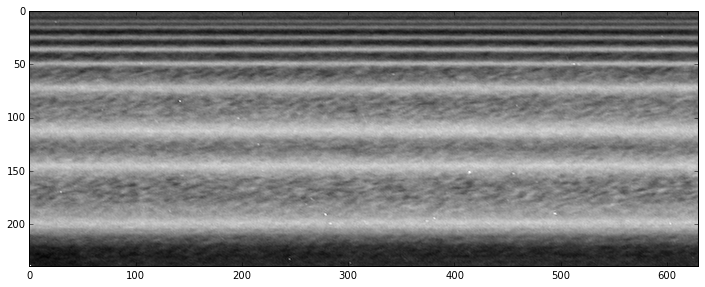

In [13]:
plt.imshow(subframe, vmin=0.07, vmax=0.11, interpolation='sinc')

# Removal of density wave

First look at one azimuthal pixel.

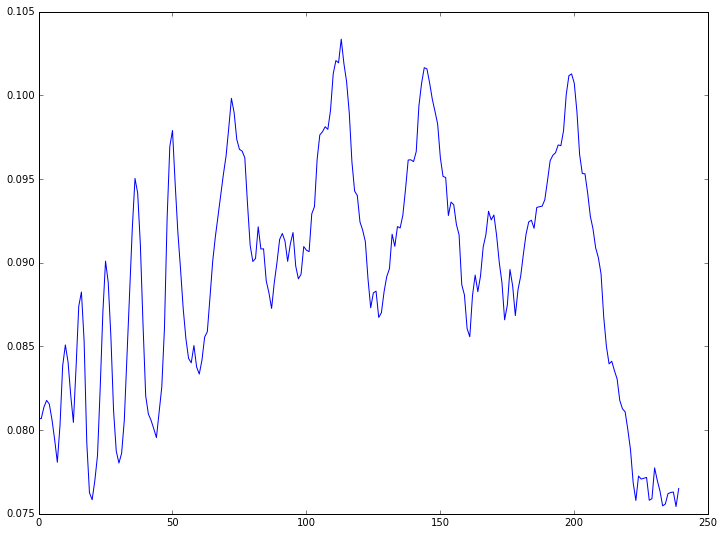

In [14]:
plt.plot(subframe[:, 250])

Possibly it will be better to get the mean value across the azimuth for a good density wave structure.

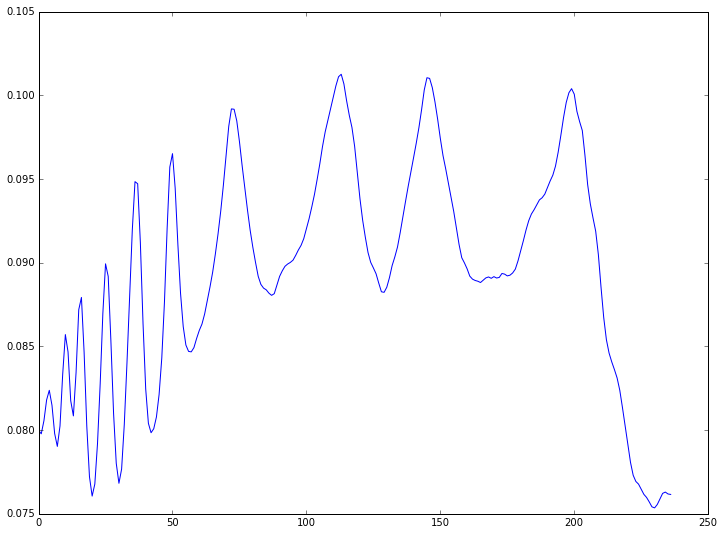

In [15]:
azimuth_mean = subframe.mean(axis=1)
plt.plot(azimuth_mean)

See how the structures between the large peaks have been removed by the averaging.

In [16]:
subframe.shape

(240, 630)

In [17]:
subtracted = subframe - azimuth_mean[:,np.newaxis]

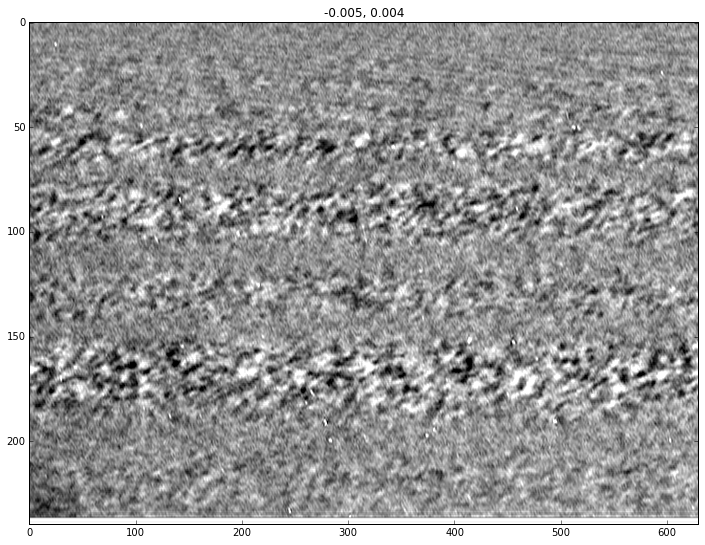

In [18]:
def show_img(img, vmin, vmax):
    plt.imshow(img, vmin=vmin, vmax=vmax, aspect='auto', interpolation='sinc')
    plt.title("{}, {}".format(vmin, vmax))
    plt.show()
    
interact(show_img, img=fixed(subtracted), vmin=(-0.007, 0, 0.001), vmax=(0., 0.021, 0.001));

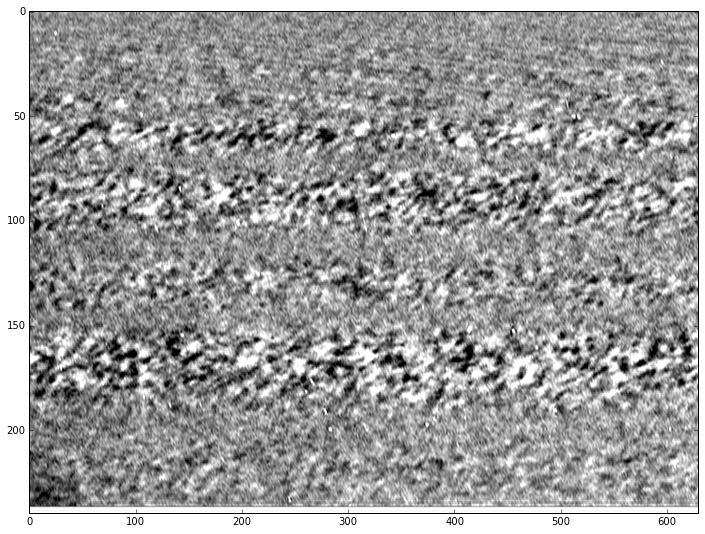

In [22]:
plt.imshow(subtracted, vmin=-0.004, vmax=0.003, interpolation='sinc',aspect='auto')
plt.savefig('real_waves_or_not.png', dpi=150)

In [23]:
pwd

u'/Users/klay6683/data/ciss/img_from_miodraks_set'

In [39]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

In [40]:
filtered = gaussian_filter(subframe, 1)

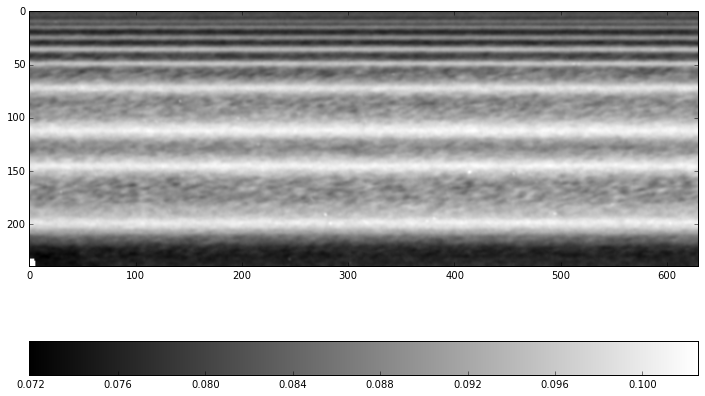

In [41]:
plt.imshow(filtered)
plt.colorbar(orientation='horizontal')

In [42]:
image = np.nan_to_num(filtered)

In [43]:
seed = np.copy(image)

In [44]:
seed[1:-1, 1:-1] = image.min()

In [45]:
mask = image

In [46]:
dilated = reconstruction(seed, mask, method='dilation')

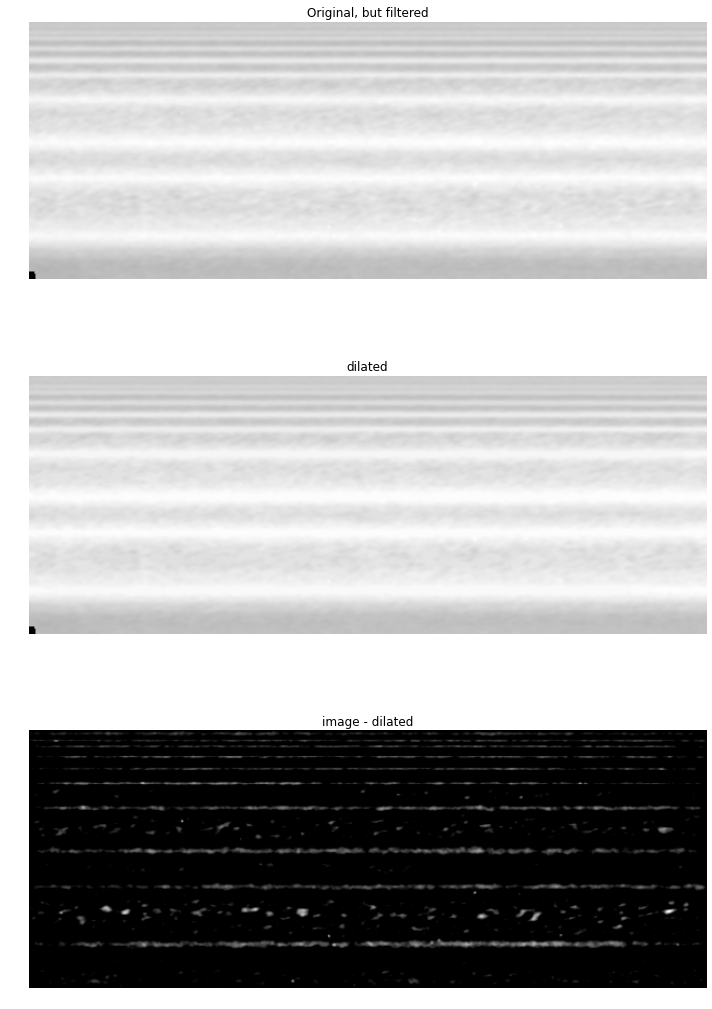

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,15))
ax1.imshow(image)
ax1.set_title('Original, but filtered')
ax1.axis('off')

ax2.imshow(dilated)
ax2.set_title('dilated')
ax2.axis('off')

ax3.imshow(image - dilated)
ax3.set_title('image - dilated')
ax3.axis('off')

fig.tight_layout()

In [50]:
dilate_subtracted = image - dilated

In [87]:
interact(show_img, img=fixed(dilate_subtracted),
         vmin=(-0.007, 0, 0.001), vmax=(0., 0.021, 0.001));

/Users/klay6683/miniconda3/lib/python3.4/site-packages/IPython/utils/traitlets.py:438: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


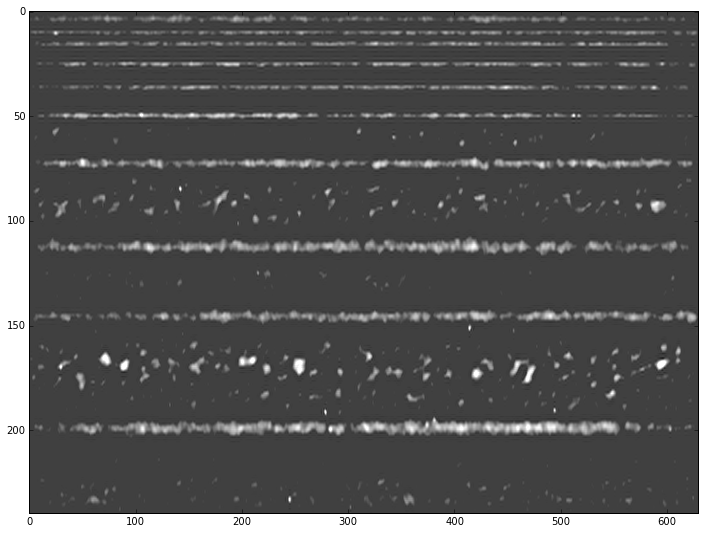

In [88]:
plt.imshow(dilate_subtracted, vmin=-0.001, vmax=0.003, interpolation='sinc')

In [62]:
from skimage.filter.rank import maximum, minimum, gradient

In [65]:
from skimage.morphology import disk
from skimage import img_as_ubyte